In [1]:
from loreal_poc.datasets.dataset_300W import Dataset300W
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.models.face_alignment import FaceAlignmentModel
import numpy as np

Benchmark

In [2]:
ds = Dataset300W(dir_path="300W/sample")

L'Oreal

In [3]:
from loreal_poc.datasets.base import FacialParts
chosen_idx = 4
image = ds.all_images[chosen_idx]
facial_parts = FacialParts.right_eye + FacialParts.right_eyebrow + FacialParts.nose
picked_landmarks = ds.all_marks_for(facial_parts)[chosen_idx]

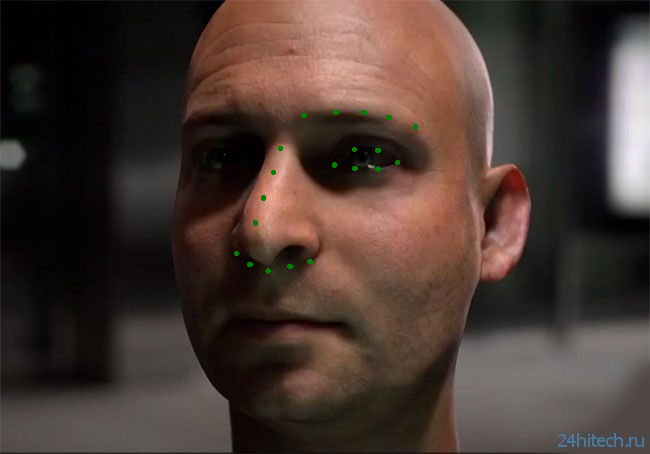

In [4]:
draw_marks(image, [picked_landmarks], ["green"])

In [5]:
def crop(image, marks, rel_margin=0.0):
    
    w, h = image.size
    margins = np.array([w, h])*rel_margin
    L, R = np.nanmin(marks, axis=0), np.nanmax(marks, axis=0)
    
    left = L[0] - margins[0]
    upper = L[1] - margins[1]
    right = R[0] + margins[0]
    lower = R[1] + margins[1]

    cropped_image = image.crop((left, upper, right, lower))
    
    return cropped_image

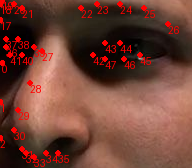

In [6]:
model = FaceAlignmentModel()
cropped_image = crop(image, picked_landmarks, rel_margin=0.01)
ds._all_images[chosen_idx] = cropped_image # TEMP to simulate the functionality
predictions = model.predict(ds, [chosen_idx])
draw_marks(cropped_image, [predictions[0]], ["red"], [True])

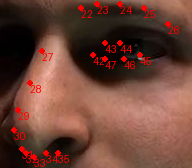

In [7]:
#TODO: integrate
# from all_marks_for in datasets.base
idx = ~np.isin(FacialParts.entire, facial_parts)
relevant_predictions = predictions.copy()
relevant_predictions[:, idx, :] = np.nan
draw_marks(cropped_image, [relevant_predictions[0]], ["red"], [True])